# The Model Project (BCG group) 
## **Solving the OLG Model**

In [1]:
#importing the necessary packages 

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

**Firm's Problem**

The **production function** is a **Cobb-Douglas** with the format of:

\\[ Y_{t} = K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\\]

where:

1. $Y_t = F(K_t,A_tL_t)$ is the produced output  

* $K_t$ is the capital

* $L_t$ is the labor force, growing exogenously at rate $n$,\\[L_{t+1} = {(1-n)} L_{t}\\]

* $A_t$ is the index of technological progress, growing exogenously at rate of $g$,\\[A_{t+1} = {(1-g)} A_{t}\\] 

* $a$ is the share of physical capital and 0 < $a$ < 1

**Note 1:** It is assumed that capital ($K_{t}$) depreciates at rate $\delta$ per period, too. 

**Note 2:** It is more convenient to write $Y_{t}$ and $K_{t}$ per effective worker, so \\[y_{t} = \frac {Y_{t}}{A_{t}L_{t}}\\] and \\[k_{t} = \frac {K_{t}}{A_{t}L_{t}}\\]

**Note 3:** The firm is trying to maximize its profits under perfect competition and no-adjustment costs. So, in the equillibrium firms want to equalise both **Marginal Products $(MPK_t, MPL_t)$** with their rental rates **($r_{t} + \delta$, $w_{t}$)**, respectively. 

**FOC's** of the production fuction

\\[ MPK_{t} : {\alpha}k_{t}^{\alpha-1} = r_{t}+{\delta}\\]

\\[ MPL_{t} : {1-\alpha}A_{t}k_{t}^{\alpha} = w_{t}\\]

Defining and solving the firm's problem symbolically.

In [2]:
#activating pretty printing
sm.init_printing(use_unicode=True)

In [3]:
#Defining symbolically the needed variables

alpha = sm.symbols('alpha') # share of physical capital
k = sm.symbols ('k_t') # capital
r = sm.symbols('r_t') # interest rate
delta = sm.symbols('delta') # depreciation rate of capital per period
w = sm.symbols('w_t') # wage 
A = sm.symbols('A_t') # technological index

#Checking that our variables have the proper format
alpha, k, r, delta, w, A

In [31]:
# Setting the FOCs equal with their respective rental rates 

MPK = sm.Eq((alpha*k**(alpha-1)), r+delta)
MPL = sm.Eq (((1-alpha)*A*k), w)

MPK, MPL

In [32]:
Kappa = sm.solve(MPK, k) # This is the demand, expressed in terms of interest rate (r_t)

Kappa

In [33]:
G = MPL.subs(k, Kappa[0]) # This will be used later to calculate the supply

G

In [34]:
Wage = sm.solve(G, w) 

Wage

Household's problem 

In [35]:
c1 = sm.symbols('c_1_t') #consumption p1
c2 = sm.symbols('c_2_t+1') #consumption p2
beta = sm.symbols('beta') #subjective discount factor 0<beta<1


#z0 =sm.symbols('z_t')
z = sm.symbols('z_t+1') #asset
#z2 = sm.symbols ('z_t+2')
#w = sm.symbols('w_t')     #wage
r1 = sm.symbols('r_t+1') #interest rate

u = sm.symbols('U_t') #utility
L = sm.symbols('L')
omega = sm.symbols('omega')

c1,c2, beta, w, z, r, L, omega

In [36]:
#Defining the utility function
def utility(c1, c2, beta):
    return (sm.log(c1) + beta*sm.log(c2))

Explaining the two constraints and acquiring the **Lifetime Budget Constraint** that will be used to maximize the utility

In [37]:
budget_constraint_1 = sm.Eq(z, w - c1)
budget_constraint_1

In [38]:
budget_constraint_2 = sm.Eq(c2, z*(1+r1))
budget_constraint_2

In [39]:
#Isolate 
z_from_con = sm.solve(budget_constraint_1, z)
z_from_con

In [40]:
lifetime_budget_constraint = budget_constraint_2.subs(z, z_from_con[0])
lifetime_budget_constraint

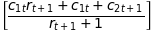

In [41]:
budget_constraint_final = sm.solve(lifetime_budget_constraint, w)
budget_constraint_final

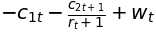

In [42]:
#defining the lifetime budget constraint to import it to the Langrangian
budget_constraint = w - c1 - c2/(1+r)

budget_constraint

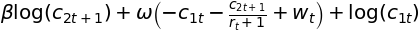

In [43]:
#Constructing the Langrangian
Langrangian = utility(c1, c2, beta) + omega * budget_constraint

Langrangian

In [44]:
foc_c1 = sm.diff(Langrangian, c1)
foc_c2 = sm.diff(Langrangian, c2)

foc_c1, foc_c2

In [45]:
foc1 = sm.solve(foc_c1, omega)

foc1

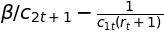

In [46]:
foc2 = foc_c2.subs(omega, foc1[0])

foc2

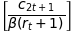

In [47]:
B = sm.solve(foc2, c1)

B

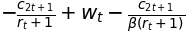

In [48]:
C = budget_constraint.subs(c1, B[0])

C

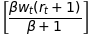

In [49]:
D = sm.solve(C,c2)

D

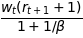

In [63]:
Consumption_2 = (1+r1)*(1/(1+1/beta))*w
Consumption_2

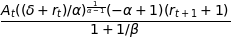

In [64]:
Final2 = Consumption_2.subs(w, Wage[0])
Final2

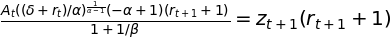

In [65]:
Final3 = budget_constraint_2.subs(c2, Final2)
#Final3 = Final3.subs(r1, r)
Final3

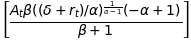

In [66]:
final4  = sm.solve(Final3, z) # Final Supply for capital
final4

To find the general equillibrium we have to equalize the supply and the demand as calculated above. Also, the solution would be found in stationary, meaning that we set $r_t$ = $r_t+1$. 

In [58]:
final5 = final4.subs(r1, r)

AttributeError: 'list' object has no attribute 'subs'

In [54]:
def f(final4, Kappa):
    return (final4- Kappa)

In [56]:
def bisection(f,a,b,max_iter=500,tol=1e-6,full_info=False):
    """ bisection
    
    Solve equation f(x) = 0 for a <= x <= b.
    
    Args:
    
        f (function): function
        a (float): left bound
        b (float): right bound
        tol (float): tolerance on solution
        
    Returns:
    
        m (float): root
    
    """
    
    # test inputs
    if f(a)*f(b) >= 0:
        print("bisection method fails.")
        return None
    
    # step 1: initialize
    _a = a
    _b = b
    a = np.zeros(max_iter)
    b = np.zeros(max_iter)
    m = np.zeros(max_iter)
    fm = np.zeros(max_iter)
    a[0] = _a
    b[0] = _b
    
    # step 2-4: main
    i = 0
    while i < max_iter:
        
        # step 2: midpoint and associated value
        m[i] = (a[i]+b[i])/2
        fm[i] = f(m[i])
        
        # step 3: determine sub-interval
        if abs(fm[i]) < tol:
            break        
        elif f(a[i])*fm[i] < 0:
            a[i+1] = a[i]
            b[i+1] = m[i]
        elif f(b[i])*fm[i] < 0:
            a[i+1] = m[i]
            b[i+1] = b[i]
        else:
            print("bisection method fails.")
            return None
        
        i += 1
        
    if full_info:
        return m,i,a,b,fm
    else:
        return m[i],i

In [57]:
m,i = bisection(f,-8,7)
print(i,m,f(m))

TypeError: f() missing 1 required positional argument: 'Kappa'